### [Visualização de Plots](https://raw.githack.com/dssg-pt/dados-MTSSS/master/notebooks/report.html)
(mapas não estão incluídos)

In [1]:
import cufflinks as cf
import numpy as np
import pandas as pd

import folium
from urllib.request import urlopen
from folium import plugins
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
import chart_studio.plotly as py
import chart_studio
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "svg"
cf.set_config_file(theme='white')

from plotly.subplots import make_subplots

In [2]:
username = 'japana26' 
api_key = 'NBmv7lxRA8r0wa9vQZdz'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [3]:
baixas_all = pd.read_csv('../dataframes/baixas_all.csv')
baixas_distrito = pd.read_csv('../dataframes/baixas_distrito.csv')
df_layoff = pd.read_csv('../dataframes/df_layoff.csv')
df_companies = pd.read_csv('../dataframes/companies_gender_data.csv')
df_work = pd.read_csv('../dataframes/df_work.csv')
df_size = pd.read_csv('../dataframes/organization_dimension.csv')
df_region = pd.read_csv('../dataframes/organization_region.csv')
despedimentos = pd.read_csv('../dataframes/despedimentos_coletivos.csv')
historical_data_company = pd.read_csv('../original_files/historical_data_company.csv')

### Nº de Baixas Por Isolamento

https://plotly.com/~japana26/1/


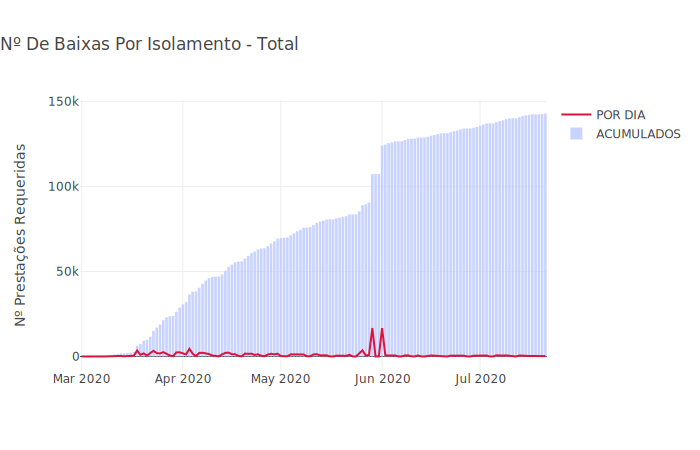

In [4]:
fig1 = go.Figure()

fig1.add_trace(go.Scatter(x=baixas_all['DATA'],
                         y=baixas_all['POR DIA'],
                         name='POR DIA',
                         line=dict(color='crimson')))

fig1.add_trace(go.Bar(x=baixas_all['DATA'],
                     y=baixas_all['ACUMULADOS'],
                     name='ACUMULADOS',
                     marker_color='rgba(195, 206, 350, 0.9)'))

fig1.update_layout(title="Nº De Baixas Por Isolamento - Total", title_x=0, xaxis_title="",yaxis_title="Nº Prestações Requeridas",
                 width=900, height=500,template='gridon')

url1 = py.plot(fig1, filename='baixas_por_isolamento',auto_open=False)
print(url1)
fig1.show()

Súbidas nos dias 29 de Maio e 1 de Junho:
* No dia 29 de Maio o estado de calamidade em Portugal é renovado por mais quinze dias.
* No mesmo dia é  aprovada a terceira fase do plano de desconfinamento, com restrições e regras especiais para a área de Lisboa, devido ao aumento de casos de covid-19. 
* Nesta última fase iniciada no dia 1 de junho reabriram as grandes superfícies - as lojas com mais de 400 metros quadrados - como os centros comerciais, o pré-escolar, os centros de ocupação de tempos livres e os ginásios.
* Teletrabalho deixa de ser obrigatório nesta terceira fase. 
***
O número elevado de baixas nos dias 29 e 1 de Junho refleta o estado de preocupação da população que continua a sentir-se mais segura em casa, evitando a deslocação para o trabalho. É provável que estas baixas se notem principalmente nas grandes superfícies (centros comerciais), ginásios e pré-escolares uma vez que estas mesmas reabriram na terceira fase. "Dentro deste grupo de pessoas, encontram-se os trabalhadores dos grupos considerados de risco, que decidam faltar ao trabalho por não terem apoio previsto entre o conjunto das medidas aprovadas pelo Governo, segundo advogados consultados pela Lusa."

***
https://expresso.pt/coronavirus/2020-04-06-Covid-19-Pessoas-de-risco-que-decidam-faltar-ao-trabalho-nao-tem-apoios

In [5]:
baixas_distrito.drop([0,0], axis=0, inplace=True)

https://plotly.com/~japana26/4/


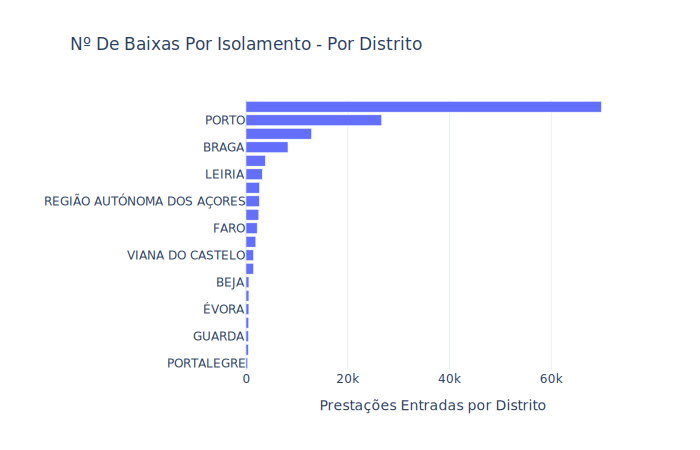

In [6]:
fig2 = go.Figure(go.Bar(x=baixas_distrito['TOTAL'],y=baixas_distrito['DISTRITO'],orientation='h'))

fig2.update_layout(title='Nº De Baixas Por Isolamento - Por Distrito ',title_x=0.1, template='plotly_white', 
                  xaxis_title="Prestações Entradas por Distrito",yaxis_title="",
                 yaxis={'categoryorder':'total ascending'},width=900, height=500)
url2 = py.plot(fig2, filename='baixas_distrito',auto_open=False)
print(url2)
fig2.show()

* Desde o início da pandemia Ovar, em Aveiro, tem sido um dos concelhos mais afectados pelo covid-19 com 690 casos confirmados até hoje (15 de Julho) entre os seus cerca de 55.400 habitantes. Trabalhadores estiveram impedidos de trabalhar no concelho ou fora dele devido à quarentena geográfica iniciada a 18 de março nesse município, na sequência do estado de calamidade pública gerado pela covid-19.

https://zap.aeiou.pt/trabalhadores-ovar-seguranca-social-cerco-sanitario-319104

* De seguida, Porto, Lisboa e Braga destacam-se entre os distritos com mais risco. 

### Lay Off - Estimativa

In [7]:
df_layoff['REMUNERAÇÕES DECLARADAS'] = df_layoff['REMUNERAÇÕES DECLARADAS'].astype(int)

https://plotly.com/~japana26/10/


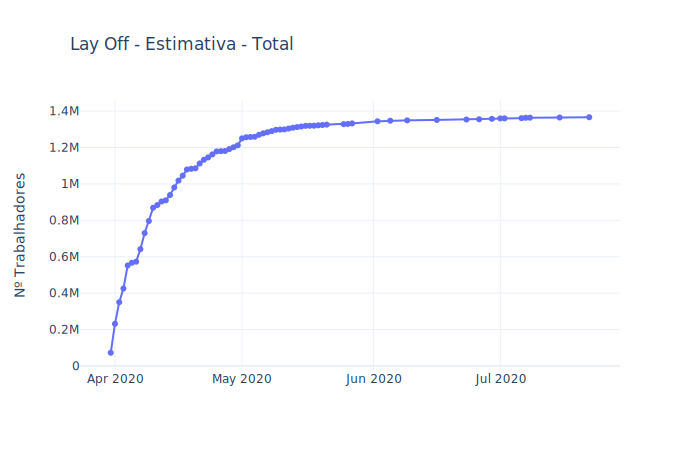

In [8]:
fig3 = go.Figure()

fig3.add_trace(
    go.Scatter(x=df_layoff['DATA'], y=df_layoff['Nº TRABALHADORES'], name='Nº TRABALHADORES',
              mode = 'markers+lines')
)
fig3.update_layout(height=500, width=900, title_text="Lay Off - Estimativa - Total", title_x=0.1,
                 yaxis_title="Nº Trabalhadores",xaxis_title="",template='plotly_white')

url3 = py.plot(fig3, filename='df_layoff',auto_open=False)
print(url3)
fig3.show()

Número de pedidos acumulados, sem indicação das empresas que já não estão em sistema de lay off. Esperava-se uma queda depois de 1 de Junho com o início da terceira fase de desconfidamento mas tal não é visível no gráfico.

### Layoff – Estim. - CAE,Dim,Dist

3.1  Data Analysis by Work Sectors and Genders

In [9]:
df=pd.read_csv('../original_files/historical_data_company.csv')
df=df.iloc[:,1:]
df_2=df.head(21)
df_unpivoted = df_2.melt(id_vars=['Setor'], var_name='Date', value_name='Total')

https://plotly.com/~japana26/13/


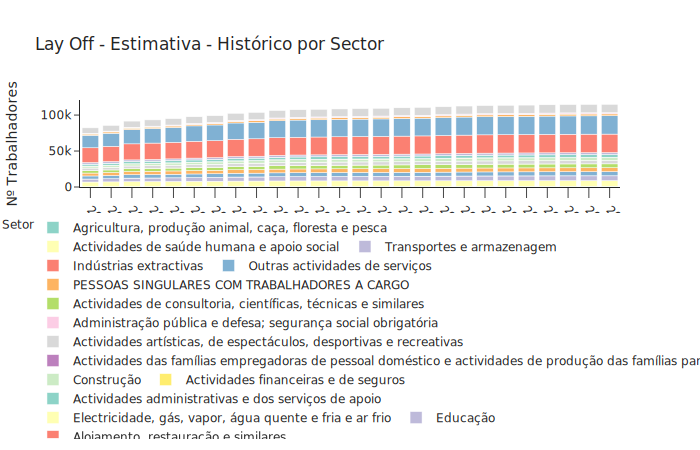

In [10]:
df = df_unpivoted
fig4 = px.bar(df, x="Date", y="Total", color='Setor',
             height=700,
             width=1000,
             title="Lay Off - Estimativa - Histórico por Sector",
            color_discrete_sequence=px.colors.qualitative.Set3)
fig4.update_layout(template='simple_white', legend_orientation="h",xaxis=dict(type="category", categoryorder="category ascending", tickangle = 90,
        title_text = ""),yaxis = dict(
        title_text = "Nº Trabalhadores"),legend=dict(
        x=0.0,
        y=-0.3))
fig4.update_xaxes(ticks="outside", tickwidth=1, ticklen=10, tickangle=45)

url4 = py.plot(fig4, filename='layoff_setor',auto_open=False)
print(url4)
fig4.show()

https://plotly.com/~japana26/18/


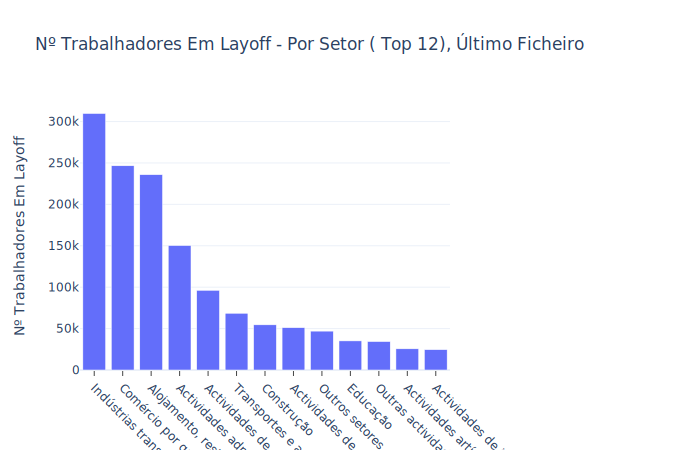

In [11]:
#Edit information to obtain the 12 most affected sectors, and include an extra sector which adds the rest of the 9 sectors, who
#were included in the study, adding them as "Outros Setores"

#Select the needed information
df_pieTotal=df_work[['Setor','Nº TRABALHADORES']]
#sort values by the number of unemployed males
df_pieTotal=df_pieTotal.sort_values(by=['Nº TRABALHADORES'],ascending=False)
#calculate the sum of the other sectors affected
TotalOutros_setores=sum(df_pieTotal['Nº TRABALHADORES'].tail(9))
#Make a new row with the sum of the rest of sectors affected
new_row=pd.Series(data={'Setor':'Outros setores','Nº TRABALHADORES':TotalOutros_setores})
#Append the new row to the existing information
df_pieTotal=df_pieTotal.append(new_row, ignore_index=True)
#sort values again by number of unemployed 
df_pieTotal=df_pieTotal.sort_values(by=['Nº TRABALHADORES'],ascending=False)
#clean the data
df_pieTotal=df_pieTotal.reset_index()
df_pieTotal=df_pieTotal.set_index('Setor')
df_pieTotal=df_pieTotal.drop('index',1)
#select the data to plot and store it in a new dataframe, select the first 12 rows (12 sectors more affected + other sectors)
df_pieTotal1=df_pieTotal['Nº TRABALHADORES']
df_pieTotal1=df_pieTotal1.head(13)

#Make a bar chart of the 12 most affected sectors + other sectors for the last report

fig5 = go.Figure(go.Bar(
            x=df_pieTotal1.index,
            y=df_pieTotal1.values,
            orientation='v'),
               )
fig5.update_layout(
    height=800, width=1000,
    title='Nº Trabalhadores Em Layoff - Por Setor ( Top 12), Último Ficheiro',
    template='plotly_white', 
    yaxis_title="Nº Trabalhadores Em Layoff",
    xaxis_title="",
    yaxis={'categoryorder':'total ascending'}
    )
fig5.update_xaxes(ticks="outside",tickangle=45,automargin=True)
url5 = py.plot(fig5, filename='layoff_recent',auto_open=False)
print(url5)
fig5.show()

https://plotly.com/~japana26/15/


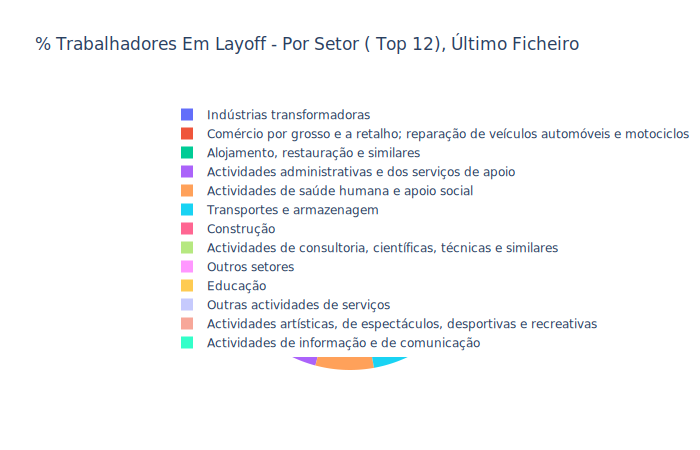

In [12]:
#Present the same information on a pie chart
df = df_pieTotal1
fig6 = px.pie(df, values=df_pieTotal1.values, names=df_pieTotal1.index,
             title='% Trabalhadores Em Layoff - Por Setor ( Top 12), Último Ficheiro',width=1100, height=500)
fig6.update_traces(textposition='inside', textinfo='percent')
fig6.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
url6 = py.plot(fig6, filename='layoff_pie',auto_open=False)
print(url6)
fig6.show()

In [13]:
# Make a list with the 12 most affected sectors, plus presenting an 13th sector with the sum of the other sectors affected  for 
#For male gender
#Select the needed information
df_pieMale=df_work[['Setor','Masculino']]
#sort values by the number of unemployed males
df_pieMale=df_pieMale.sort_values(by=['Masculino'],ascending=False)
#calculate the sum of the other sectors affected
TotalOutros_setores=sum(df_pieMale['Masculino'].tail(9))
#Make a new row with the sum of the rest of sectors affected
new_row=pd.Series(data={'Setor':'Outros setores','Masculino':TotalOutros_setores})
#Append the new row to the existing information
df_pieMale=df_pieMale.append(new_row, ignore_index=True)
#sort values again by number of unemployed 
df_pieMale=df_pieMale.sort_values(by=['Masculino'],ascending=False)
#clean the data
df_pieMale=df_pieMale.reset_index()
df_pieMale=df_pieMale.set_index('Setor')
df_pieMale=df_pieMale.drop('index',1)
#select the data to plot and store it in a new dataframe, select the first 12 rows (12 sectors more affected + other sectors)
df_pieMale=df_pieMale['Masculino']
df_pieMale=df_pieMale.head(13)


# Make a list with the 12 most affected sectors, plus presenting an 13th sector with the sum of the other sectors affected  for 
#For female gender
#Select the needed information
df_pieFemale=df_work[['Setor','Feminino']]
#sort values by the number of unemployed males
df_pieFemale=df_pieFemale.sort_values(by=['Feminino'],ascending=False)
#calculate the sum of the other sectors affected
TotalOutros_setores=sum(df_pieFemale['Feminino'].tail(9))
#Make a new row with the sum of the rest of sectors affected
new_row=pd.Series(data={'Setor':'Outros setores','Feminino':TotalOutros_setores})
#Append the new row to the existing information
df_pieFemale=df_pieFemale.append(new_row, ignore_index=True)
#sort values again by number of unemployed 
df_pieFemale=df_pieFemale.sort_values(by=['Feminino'],ascending=False)
#clean the data
df_pieFemale=df_pieFemale.reset_index()
df_pieFemale=df_pieFemale.set_index('Setor')
df_pieFemale=df_pieFemale.drop('index',1)
#select the data to plot and store it in a new dataframe, select the first 12 rows (12 sectors more affected + other sectors)
df_pieFemale=df_pieFemale['Feminino']
df_pieFemale=df_pieFemale.head(13)

https://plotly.com/~japana26/21/


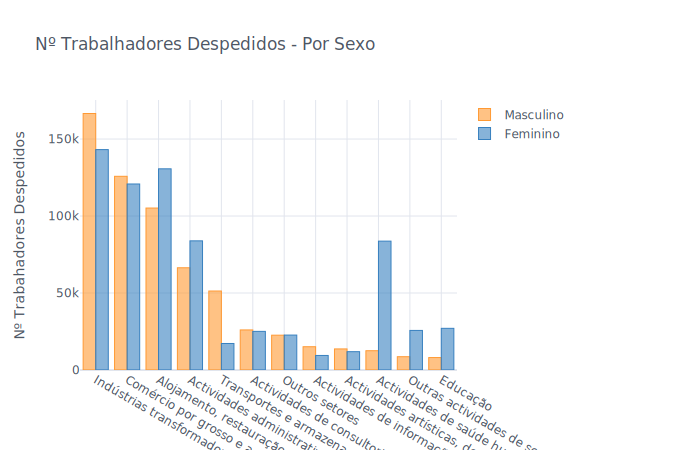

In [14]:
#Present a bar chart presenting the total amount of layoffs divided by gender on separate bars.
pd_bar=pd.merge(left=df_pieMale, right=df_pieFemale, left_on=df_pieMale.index, right_on=df_pieFemale.index)

fig7 = pd_bar.iplot(asFigure=True, kind='bar',barmode = 'group', x='key_0',
               xTitle='',yTitle='Nº Trabahadores Despedidos',title='Nº Trabalhadores Despedidos - Por Sexo')
# plot figure
url7 = py.plot(fig7, filename='layoff_gender',auto_open=False)
print(url7)
fig7.show()

https://plotly.com/~japana26/24/


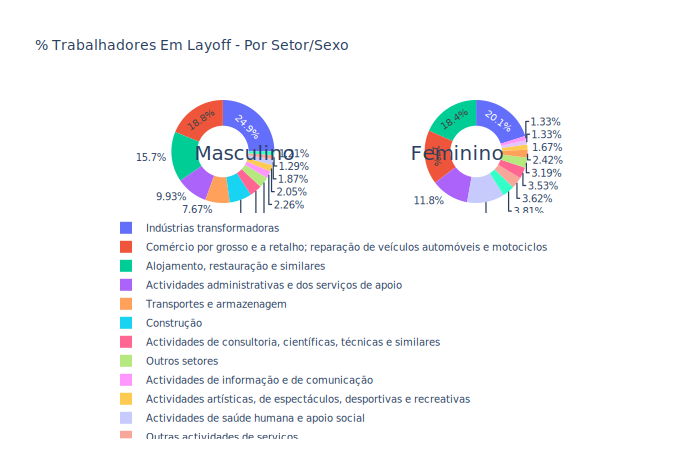

In [15]:
#Make a pie chart showing male and female layoff amount by sector
trace1 = go.Pie(labels=df_pieMale.index, 
                    values=df_pieMale.values, 
                    name= "male", 
                    hole= .5, 
                    domain= {'x': [0, .48]})

trace2 = go.Pie(labels=df_pieFemale.index, 
                    values=df_pieFemale.values, 
                    name="female", 
                    hole= .5,  
                    domain= {'x': [.52, 1]})

layout = dict(title= '% Trabalhadores Em Layoff - Por Setor/Sexo', width=1000, height=750,
              font=dict(size=10), legend=dict(orientation="h"),
                  annotations = [
                      dict(
                          x=.18, y=.5,
                          text='Masculino', 
                          showarrow=False,
                          font=dict(size=20)),
                      dict(
                          x=.82, y=.5,
                          text='Feminino', 
                         showarrow=False,
                          font=dict(size=20))])

fig8 = dict(data=[trace1, trace2], layout=layout)
url8 = py.plot(fig8, filename='layoff_gender_sector',auto_open=False)
print(url8)
iplot(fig8)

3.2 Analysis by Organization dimension

https://plotly.com/~japana26/28/


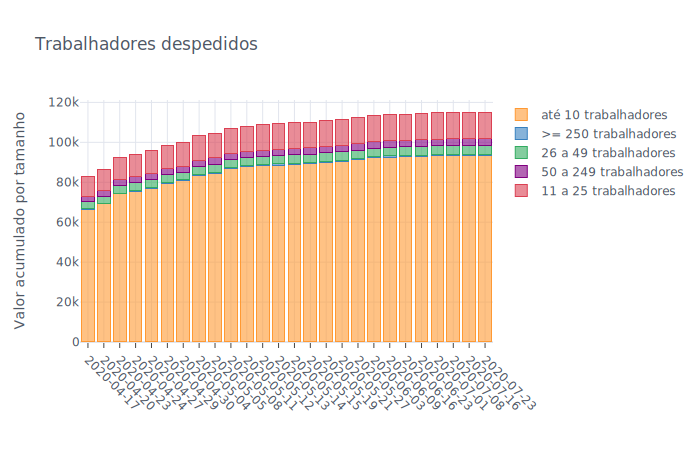

In [16]:
df_CompSize=pd.read_csv(r'../original_files/historical_data_company_size.csv')
df_CompSize=df_CompSize.drop(['Unnamed: 0'],axis=1)
df_CompSize=df_CompSize.transpose()
df_CompSize=df_CompSize.reset_index()
df_CompSize.columns=df_CompSize.iloc[0]
df_CompSize=df_CompSize.iloc[1:]

cf.set_config_file(theme='white')
fig9 = df_CompSize.iplot(asFigure=True, kind='bar',barmode = 'stack', x='TOTAL',
               xTitle='',yTitle='Valor acumulado por tamanho',title='Trabalhadores despedidos')
fig9.update_layout(xaxis=dict(type="category", categoryorder="category ascending"))
fig9.update_xaxes(ticks="outside", tickwidth = 1, tickangle=45)
fig9["layout"].pop("updatemenus")
# plot figure
url9 = py.plot(fig9, filename='organization_dimension',auto_open=False)
print(url9)
iplot(fig9)

3.3 Data Analysis By Region

In [17]:
#ANALYSIS BY REGION
import json

#import the Portugal Json file
with urlopen('https://raw.githubusercontent.com/deldersveld/topojson/master/countries/portugal/portugal-districts.json') as response:
    portugal_geo = json.load(response)

#Get latitude and longitude of Portugal
Portugalcoordinates=(39.399,-8.224)

#Divide into 2 sections, continental and islands
df_continental=df_region.iloc[0:18]
df_island=df_region.iloc[18:22]

df_continental['Latitude']=['40.644','38.015','41.503','41.805','39.823','40.205','38.566','37.019','40.537','39.744','38.716','39.291',
                         '41.149','39.135','38.524','41.644','41.295','40.657']
df_continental['Longitude']=['-8.6455','-7.865','-8.420','-6.757','-7.491','-8.419','-7.900','-7.932','-7.265','-8.807','-9.133',
                            '-7.432','-8.610','-8.405','-8.893','-8.830','-7.746','-7.914']
df_continental['Latitude']=df_continental['Latitude'].astype(float)
df_continental['Longitude']=df_continental['Longitude'].astype(float)
df_continental=df_continental.reset_index()
df_continental=df_continental.drop('index',1)

In [18]:
from folium import plugins
# creation of the choropleth
map2 = folium.Map(location=Portugalcoordinates, zoom_start=6)
map2.choropleth(geo_data = portugal_geo, 
                  name='choroplet',
                  data = df_continental,
                  columns = ['Region', 'N° Empresas'],
                  topojson='objects.PRT_adm1',
                  key_on = 'feature.properties.NAME_1',
                  fill_color = 'YlOrRd', 
              fill_opacity = 0.8, 
              line_opacity = 0.3,
              legend_name = 'count by district')

#create marker clusters
for i in range(df_continental.shape[0]): 
    location = [df_continental.Latitude[i],df_continental.Longitude[i]]
    tooltip  = "Region:{}<br>,Total Percent layoff Portugal (%): {}<br>, Total empresas layoff: {}<br> ".format(df_continental['Region'][i], 
                                                                                                     round(df_continental['Percentual(%)'][i],2),
                                                                                                     df_continental['N° Empresas'][i])

    folium.Marker(location,popup=tooltip).add_to(map2)



map2             
              
               

C:\Users\Ana\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [19]:
df_island=df_island.reset_index()

#Azores
df_azores=df_island.iloc[0:1]
df_azores['Latitude']=['37.794']
df_azores['Longitude']=['-25.506']

#import the Azores Json file
with urlopen('https://raw.githubusercontent.com/georgique/world-geojson/master/areas/portugal/azores.json') as response:
    azores_geo = json.load(response)

#Get latitude and longitude of Azores
Azorescoordinates=(37.794,-25.506)

# creation of the map
map3 = folium.Map(location=Azorescoordinates, zoom_start=6)

# instantiate a feature group for the incidents in the dataframe
feature = folium.map.FeatureGroup()



for lat, lng, in zip(df_azores.Latitude,df_azores.Longitude):
    feature.add_child(
        folium.CircleMarker(
            location=[lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
             fill_opacity=0.6))
    


#create marker clusters
for i in range(df_azores.shape[0]): 
    location = [df_azores.Latitude[i],df_azores.Longitude[i]]
    tooltip  = "Region: Azores,Total Percent layoff Portugal (%): {}<br>, Total empresas layoff: {}<br> ".format(round(df_azores['Percentual(%)'][i],2),
                                                                                                     df_azores['N° Empresas'][i])

    folium.Marker(location,popup=tooltip).add_to(map3)
    
#add incidents to map
map3


In [20]:
#Madeira
df_madeira=df_island.iloc[1:2]
df_madeira['Latitude']=['32.633']
df_madeira['Longitude']=['-16.900']
df_madeira=df_madeira.reset_index()
df_madeira=df_madeira.drop('index',1)

#import the Madeira Json file
with urlopen('https://raw.githubusercontent.com/georgique/world-geojson/master/areas/portugal/madeira.json') as response:
    madeira_geo = json.load(response)

#Get latitude and longitude of Azores
Madeiracoordinates=(32.633,-16.900)

# creation of the map
map4 = folium.Map(location=Madeiracoordinates, zoom_start=7)

# instantiate a feature group for the incidents in the dataframe
feature = folium.map.FeatureGroup()



for lat, lng, in zip(df_madeira.Latitude,df_azores.Longitude):
    feature.add_child(
        folium.CircleMarker(
            location=[lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
             fill_opacity=0.6))
    


#create marker clusters
for i in range(df_madeira.shape[0]): 
    location = [df_madeira.Latitude[i],df_madeira.Longitude[i]]
    tooltip  = "Region: Madeira,Total Percent layoff Portugal (%): {}<br>, Total empresas layoff: {}<br> ".format(round(df_madeira['Percentual(%)'][i],2),
                                                                                                     df_madeira['N° Empresas'][i])

    folium.Marker(location,popup=tooltip).add_to(map4)
    
#add incidents to map
map4


### Redução de Actividade TI e MOE

4.1 Redução de Atividade por Dia

In [21]:
red_byday=pd.read_csv('../dataframes/reducao_atividade_porDia.csv') 

https://plotly.com/~japana26/30/


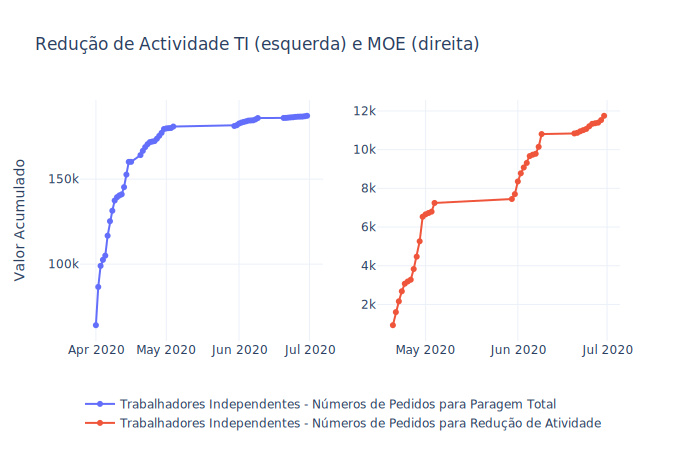

In [22]:
# Trabalhadores Independentes - Paragem Total 
df_pt=red_byday[['DATA','TI_ParagemTotal']]
df_pt['TI_ParagemTotal'] = df_pt['TI_ParagemTotal'].cumsum()
df_pt.set_index('DATA',inplace=True)
fig = go.Figure()

# Trabalhadores Independentes - Redução Atividade 
df_ra=red_byday[['DATA','TI_Reducao']]
df_ra['TI_Reducao'] = df_ra['TI_Reducao'].cumsum()
df_ra.set_index('DATA',inplace=True)
df_ra.dropna(inplace=True)

fig10 = make_subplots(rows=1, cols=2)

fig10.add_trace(
    go.Scatter(x=df_pt.index, y=df_pt['TI_ParagemTotal'].values, 
               name='Trabalhadores Independentes - Números de Pedidos para Paragem Total',mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True),
    row=1, col=1, 
)

fig10.add_trace(
    go.Scatter(x=df_ra.index, y=df_ra['TI_Reducao'].values, 
               name='Trabalhadores Independentes - Números de Pedidos para Redução de Atividade ',
               mode = 'markers+lines',
               line=dict(shape='linear'),
               connectgaps=True),
    row=1, col=2
)

fig10.update_layout(height=500, width=1100, title_text="Redução de Actividade TI (esquerda) e MOE (direita)",
                  xaxis_title="", yaxis_title="Valor Acumulado", template='plotly_white', legend=dict(
        x=0.0,
        y=-0.4))

url10 = py.plot(fig10, filename='reducao_actividade',auto_open=False)
print(url10)
fig10.show()

4.2. Redução de Atividade por Distrito

In [23]:
red_bydistrict=pd.read_csv('../dataframes/reducao_atividade_porDistrito_Total.csv')

https://plotly.com/~japana26/32/


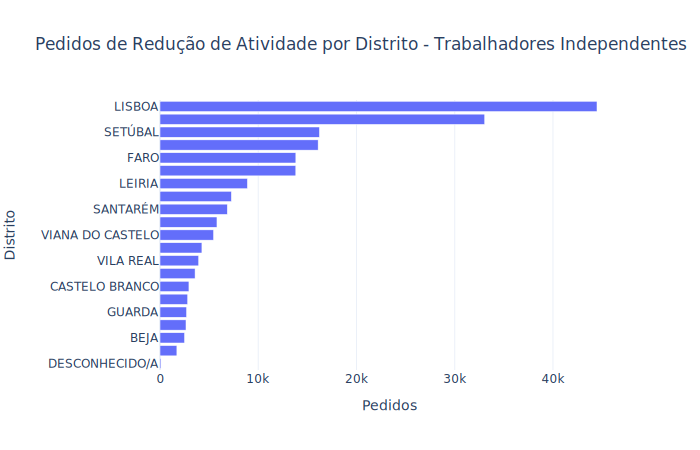

In [24]:
df=red_bydistrict.iloc[1:]
df.columns=['Distritos','Prorrogação Membro Orgão Estatutário','Prorrogação Trabalhador Independente','Membro Orgão Estatutário','Trabalhador Independente']

fig11 = go.Figure(go.Bar(
            x=df['Trabalhador Independente'],
            y=df['Distritos'],
            orientation='h'))
fig11.update_layout(
    title='Pedidos de Redução de Atividade por Distrito - Trabalhadores Independentes',
    template='plotly_white',
     xaxis_title="Pedidos",
    yaxis_title="Distrito",
    yaxis={'categoryorder':'total ascending'}
)
url11 = py.plot(fig11, filename='reducao_actividade_distrito',auto_open=False)
print(url11)
fig11.show()

https://plotly.com/~japana26/65/


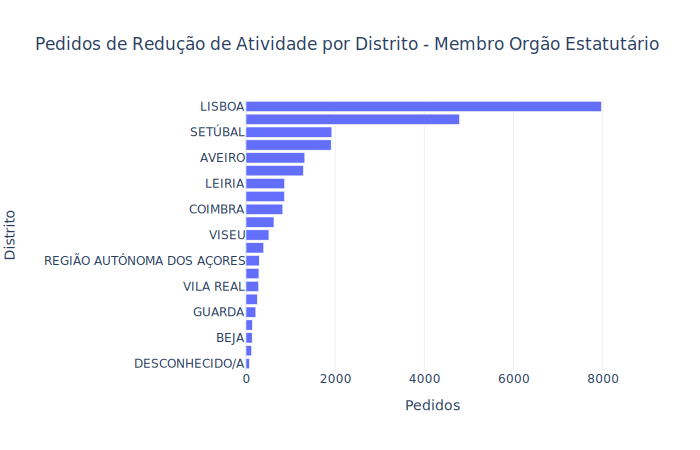

In [25]:
fig12 = go.Figure(go.Bar(
            x=df['Membro Orgão Estatutário'],
            y=df['Distritos'],
            orientation='h'))
fig12.update_layout(
    title='Pedidos de Redução de Atividade por Distrito - Membro Orgão Estatutário',
    template='plotly_white',
     xaxis_title="Pedidos",
    yaxis_title="Distrito",
    yaxis={'categoryorder':'total ascending'}
)
url12 = py.plot(fig12, filename='reducao_actividade_distrito2',auto_open=False)
print(url12)
fig12.show()

4.3 Redução de Atividade por Sexo

https://plotly.com/~japana26/34/


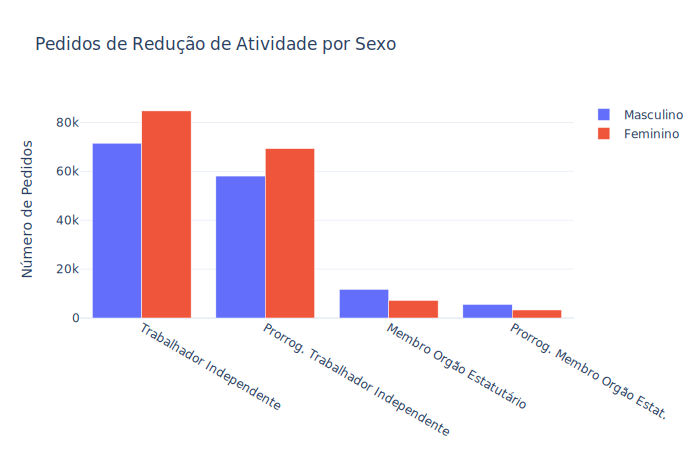

In [26]:
reducao_atividade_bysex=pd.read_csv('../dataframes/reducao_atividade_porSexo.csv')
red_bysex_aux=reducao_atividade_bysex[['TipoPedido','Feminino','Masculino']]
red_bysex_aux.loc[:,'TipoPedido']=['Trabalhador Independente','Prorrog. Trabalhador Independente','Membro Orgão Estatutário','Prorrog. Membro Orgão Estat.']
# red_bysex_aux=red_bysex_aux.melt('TipoPedido', var_name='Sexo', value_name='Numero Trabalhadores')
red_bysex_aux.set_index('TipoPedido',inplace=True)
labels=['Trabalhador Independente','Prorrog. Trabalhador Independente','Membro Orgão Estatutário','Prorrog. Membro Orgão Estat.']

fig13 = go.Figure(data=[
    go.Bar(name='Masculino', x=labels, y=red_bysex_aux['Masculino']),
    go.Bar(name='Feminino', x=labels, y=red_bysex_aux['Feminino'])
])
# Change the bar mode
fig13.update_layout(barmode='group',
                  yaxis_title="Número de Pedidos",template='plotly_white',
                 title='Pedidos de Redução de Atividade por Sexo')

url13 = py.plot(fig13, filename='reducao_actividade_sexo',auto_open=False)
print(url13)
fig13.show()

### Despedimentos coletivos

In [27]:
# Read csv
despedimentos=pd.read_csv('../dataframes/despedimentos_coletivos.csv')

https://plotly.com/~japana26/38/


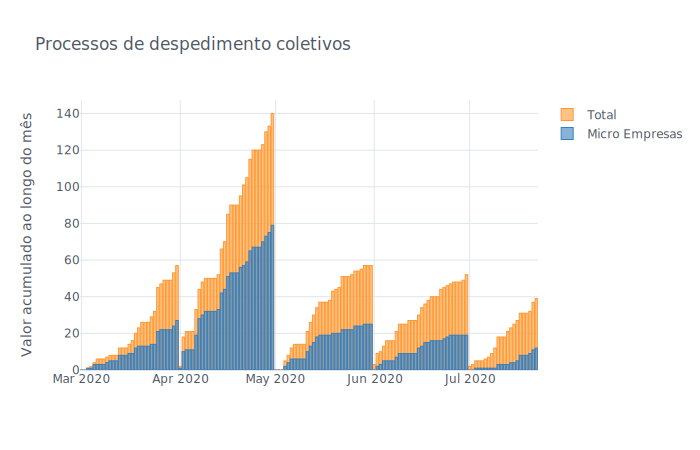

In [28]:
df = despedimentos[['DATA','COLETIVOS_TOTAL','COLETIVOS_MICRO']]
df.columns=['DATA','Total','Micro Empresas']


fig14 = df.iplot(asFigure=True, kind='bar', barmode = 'overlay', x='DATA',
               xTitle='',yTitle='Valor acumulado ao longo do mês',title='Processos de despedimento coletivos')

url14 = py.plot(fig14, filename='despedimentos',auto_open=False)
print(url14)
fig14.show()

https://plotly.com/~japana26/40/


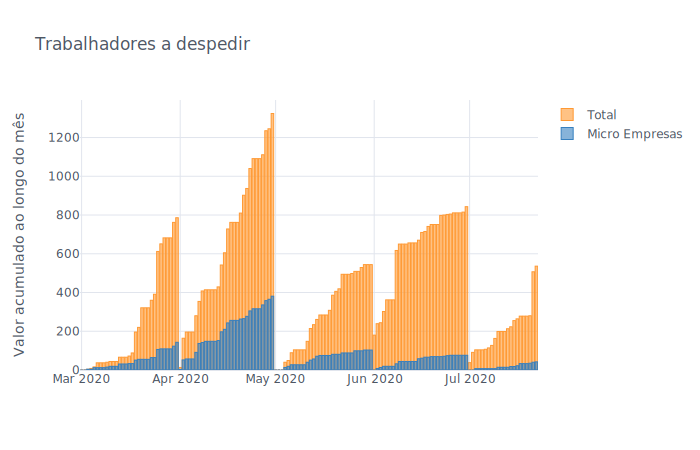

In [29]:
df = despedimentos[['DATA','TRABALHADORES_TOTAL','TRABALHADORES_MICRO']]
df.columns=['DATA','Total','Micro Empresas']


fig15 = df.iplot(asFigure=True, kind='bar',barmode = 'overlay', x='DATA',
               xTitle='',yTitle='Valor acumulado ao longo do mês',title='Trabalhadores a despedir')

url15 = py.plot(fig15, filename='despedimentos2',auto_open=False)
print(url15)
fig15.show()

In [30]:
html_string = '''
<html <meta charset="utf-8">
    <head>
        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/css/bootstrap.min.css">
        <style>body{ margin:0 100; background:whitesmoke; }</style>
    </head>
    <body>
        <h1></h1>

        <!--  *** --->
        <h2></h2>
        <iframe width="900" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url1 + '''.embed?width=900&height=550"></iframe>
        
        <!-- ***  *** --->
        <h2></h2>
        <iframe width="900" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url2 + '''.embed?width=900&height=550"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="900" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url3 + '''.embed?width=900&height=550"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="1200" height="750" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url4 + '''.embed?width=1200&height=750"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="1000" height="800" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url5 + '''.embed?width=1000&height=800"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="1100" height="500" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url6 + '''.embed?width=1100&height=500"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="1000" height="750" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url8 + '''.embed?width=1000&height=750"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="1000" height="700" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url7 + '''.embed?width=1000&height=700"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="1000" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url9 + '''.embed?width=1000&height=550"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="900" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url10 + '''.embed?width=900&height=550"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="900" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url11 + '''.embed?width=900&height=550"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="900" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url12 + '''.embed?width=900&height=550"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="900" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url13 + '''.embed?width=900&height=550"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="900" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url14 + '''.embed?width=900&height=550"></iframe>

<!-- ***  *** --->
        <h2></h2>
        <iframe width="900" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src="''' + url15 + '''.embed?width=900&height=550"></iframe>
    </body>
</html>'''

In [31]:
f = open('report.html','w')
f.write(html_string)
f.close()